# Problem Statement:
1. How *different regions* of Brazil saw their *gas prices change*?
1. Within a *region*, which *states increased more* their *prices*?
1. Which *states* are the *cheapest* (or *most expensive*) for *different types of fuels*?

# Step 00: Loading Libraries

Here we will load all necessary python libraries to solve the problem

In [1]:
import numpy as np # biblioteca de algebra 
import pandas as pd # procesamento de dados
import seaborn as sns # seaborn package
import matplotlib.pyplot as plt # matplotlib library


# Step 01: Data Load

Let's load the data from raw file with preprocessing of date field

In [2]:
# Carregando os dados
# O parametro "sep" é para a determinação do tipo de caracter vai ser usado para separar os dados
# Nesse caso é tabulado, logo se usa o termo "\t"
# O parametro "parse_dates" é ultilizado para determinar o tipo de dados que não seja int ou string
# Nesse caso são datas, portanto ela vai trasformar os dados dessa coluna em date
df = pd.read_csv('2004-2019.tsv', sep='\t',parse_dates=[1,2])

# Step 02: Data Verification

Let's check the shape of the DataFrame

In [3]:
# Retornando as dimesões do datafream
df.shape

(106823, 21)

# Step 03: Data Cleaning (Phase 01)

Let's remove the unnecessary serial column of *Unnamed: 0*

In [4]:
# Removendo a primeira coluna de index
# O parametro "axis=1" é referente a remoção de colunas
df2 = df.drop("Unnamed: 0", axis=1)

# Step 03: Data Cleaning (Phase 02)

Let's rename all columns with English meaning for better understanding

In [5]:
# Renomeando as colunas para o inglês, no caso para  publicação
# O parametro "inplace=true" é para confirmar a troca
# dtypes é usado para retornar os tipos de dados das colunas
df2.rename(
    columns={
        "DATA INICIAL": "start_date",
        "DATA FINAL": "end_date",
        "REGIÃO": "region",
        "ESTADO": "state",
        "PRODUTO": "product",
        "NÚMERO DE POSTOS PESQUISADOS": "no_gas_stations",
        "UNIDADE DE MEDIDA": "unit",
        "PREÇO MÉDIO REVENDA": "avg_price",
        "DESVIO PADRÃO REVENDA": "sd_price",
        "PREÇO MÍNIMO REVENDA": "min_price",
        "PREÇO MÁXIMO REVENDA": "max_price",
        "MARGEM MÉDIA REVENDA": "avg_price_margin",
        "ANO": "year",
        "MÊS": "month",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_max_price",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_min_price",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_sd_price",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_avg_price",
        "COEF DE VARIAÇÃO REVENDA": "coef_price"
    },
    inplace=True
)
df2.dtypes

start_date          datetime64[ns]
end_date            datetime64[ns]
region                      object
state                       object
product                     object
no_gas_stations              int64
unit                        object
avg_price                  float64
sd_price                   float64
min_price                  float64
max_price                  float64
avg_price_margin            object
coef_price                 float64
dist_avg_price              object
dist_sd_price               object
dist_min_price              object
dist_max_price              object
coef_dist                   object
month                        int64
year                         int64
dtype: object

In [6]:
# Aqui podemos ver que temos dados em formatos errados
# avg_price_margin, dist_avg_price, dist_sd_price, dist_min_price, dist_max_price, coef_dist estão como object
# porém são floats

# Step 03: Data Cleaning (Phase 03)

Now there are some mismatched values (~3%) on some columns and let's convert the *dtype* of those columns where necessary to work properly

In [7]:
# Essa estapa é para converter os tipos de dados de object para float
# Vai ser usado a condição "for" para fazer uma farreduras das colunas que estão erradas e convertelas para float
# Os nomes das colunas que estão erradas vão ser colocadas em forma de lista
for col in ['avg_price_margin', 'dist_avg_price', 'dist_sd_price', 'dist_min_price', 'dist_max_price', 'coef_dist']:
    
    # função usada para conversão foi a to_numeric
    # O parametro errors="coerce" é usado para ignorar os valores NaN
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    
    
df2.dtypes

start_date          datetime64[ns]
end_date            datetime64[ns]
region                      object
state                       object
product                     object
no_gas_stations              int64
unit                        object
avg_price                  float64
sd_price                   float64
min_price                  float64
max_price                  float64
avg_price_margin           float64
coef_price                 float64
dist_avg_price             float64
dist_sd_price              float64
dist_min_price             float64
dist_max_price             float64
coef_dist                  float64
month                        int64
year                         int64
dtype: object

# Step 04: Data Mapping & Visualization (Problem 01)

Now let's solve the problem by running necessary queries and plot the columns to see the desired insights

In [8]:
df2.head()

,start_date,end_date,region,state,product,no_gas_stations,unit,avg_price,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


In [9]:
# Aqui iremos fazer os querys, ou seja selecionar os dados
# No primeiro termo vamos querer os anos diferentes de 2019 e produtos com GLV e GNV
# Com groupby, usado para formar grupos, vamos querer separalos por year e region
# Vamos querer separar os dados por avg_price
# A função aggé usada para agregar os valores selecionados, no caso sum para somar

df2.query('year!=2019 & product in ["GLV","GNV"]').groupby(['year', 'region'])['avg_price'].agg('sum')

year  region      
2004  CENTRO OESTE      38.524
      NORDESTE         299.888
      SUDESTE          150.806
      SUL              121.749
2005  CENTRO OESTE      63.905
      NORDESTE         478.748
      NORTE             15.209
      SUDESTE          232.578
      SUL              192.467
2006  CENTRO OESTE     118.839
      NORDESTE         508.651
      NORTE             71.349
      SUDESTE          270.366
      SUL              234.323
2007  CENTRO OESTE     157.710
      NORDESTE         550.951
      NORTE             39.173
      SUDESTE          279.937
      SUL              239.275
2008  CENTRO OESTE     134.403
      NORDESTE         638.690
      NORTE             46.273
      SUDESTE          325.806
      SUL              246.183
2009  CENTRO OESTE     174.044
      NORDESTE         625.657
      NORTE             60.311
      SUDESTE          327.372
      SUL              246.767
2010  CENTRO OESTE     164.460
                        ...   
2013  CENTRO OESTE  

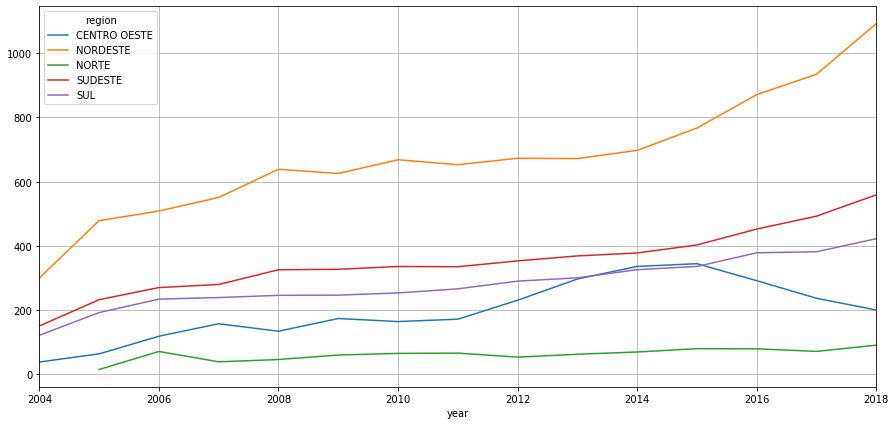

In [10]:
# Agora vamos plotar um gráfico para Average Price por região
# vamos determinar os parametos da figura e eixo com fig, ax
# plotando um figura com o tamanho de 15x7
fig, ax = plt.subplots(figsize=(15,7))
# Usamos a mesma base para separação de grupos e valors no anterios. So usamos a função sum() com o mesmo objetivo
# unstack é usado para separar a agregação do dados gerado por groupby
# plot para gerar o gráfico usamos a variavel ax 
df2.query('year!=2019 & product in ["GLV","GNV"]').groupby(['year','region']).sum()['avg_price'].unstack().plot(ax=ax)
# plt para chamar a gráfico e grip = true para mostrar as grades de fundo
plt.grid(True)

In [11]:
# Para mostar a como foi feito o dataframe separados acima
df2.query('year!=2019 & product in ["GLV","GNV"]').groupby(['year','region']).sum()['avg_price'].unstack()


region,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
year,,,,,
2004,38.524,299.888,NaN,150.806,121.749
2005,63.905,478.748,15.209,232.578,192.467
2006,118.839,508.651,71.349,270.366,234.323
2007,157.710,550.951,39.173,279.937,239.275
2008,134.403,638.690,46.273,325.806,246.183
2009,174.044,625.657,60.311,327.372,246.767
2010,164.460,668.440,65.340,335.979,253.649
2011,171.910,652.971,66.168,335.325,266.365
2012,230.935,673.010,53.790,353.393,290.341


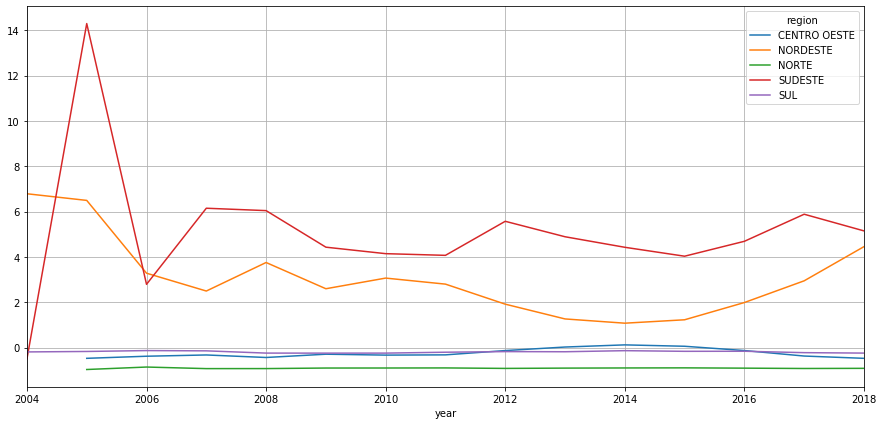

In [12]:
# plot Regionwise Yearwise Average Price Changes (% wise) data 
fig, ax = plt.subplots(figsize=(15,7))
# Aqui a diferença é a função pct_change usada para calcular a variação de porcetagem dos valores
df2.query('year!=2019 & product in ["GLV","GNV"]').groupby(['year','region']).sum()['avg_price'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

In [13]:
df2.query('year!=2019 & product in ["GLV","GNV"]').groupby(['year','region']).sum()['avg_price'].pct_change().unstack()

region,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
year,,,,,
2004,NaN,6.784446,NaN,-0.497126,-0.192678
2005,-0.475109,6.491558,-0.968232,14.292130,-0.172463
2006,-0.382549,3.280169,-0.859729,2.789345,-0.133312
2007,-0.326955,2.493444,-0.928899,6.146172,-0.145254
2008,-0.438291,3.752052,-0.927550,6.040953,-0.244388
2009,-0.293030,2.594821,-0.903604,4.428065,-0.246218
2010,-0.333541,3.064453,-0.902250,4.142011,-0.245045
2011,-0.322252,2.798331,-0.898666,4.067782,-0.205651
2012,-0.133013,1.914283,-0.920075,5.569864,-0.178419


# Solution 01
**NORDESTE** and **SUDESTE** regions are facing the massive increase on gas price ~500%

Foi constatos que as regiões nordeste e sudeste foram as que mais variaram

# Step 05: Data Mapping & Visualization (Problem 02)

Now let's solve the problem by running necessary queries and plot the columns to see the desired insights

In [14]:
# Aqui foi feito o mesmo tipo de filtragem e separação que acima
# porem na filtragem ele usa a região nordete e o groupby por states
df2.query('year!=2019 & region in ["NORDESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum')

year  state              
2004  ALAGOAS                1261.541
      BAHIA                  1299.110
      CEARA                  1304.147
      MARANHAO               1292.654
      PARAIBA                1362.776
      PERNAMBUCO             1277.268
      PIAUI                  1360.680
      RIO GRANDE DO NORTE    1251.442
      SERGIPE                1296.334
2005  ALAGOAS                1844.105
      BAHIA                  1861.471
      CEARA                  1888.653
      MARANHAO               1852.827
      PARAIBA                1992.060
      PERNAMBUCO             1821.872
      PIAUI                  1997.647
      RIO GRANDE DO NORTE    1844.942
      SERGIPE                1908.901
2006  ALAGOAS                2116.933
      BAHIA                  2126.026
      CEARA                  2119.281
      MARANHAO               2175.708
      PARAIBA                2198.297
      PERNAMBUCO             2092.100
      PIAUI                  2224.780
      RIO GRANDE DO NORT

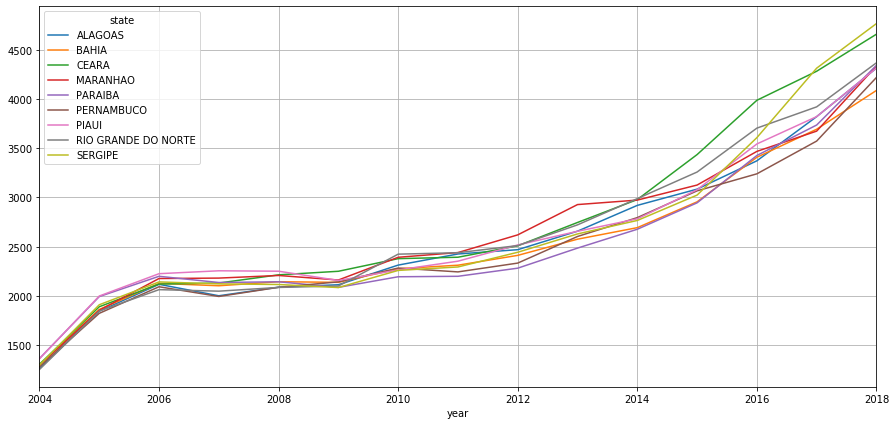

In [15]:
# plot Regionwise Yearwise Average Price data
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019 & region in ["NORDESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

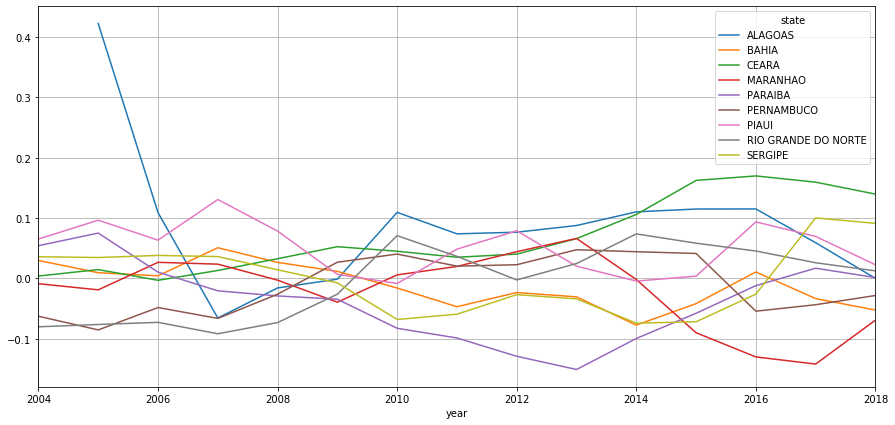

In [16]:
# plot Regionwise Yearwise Average Price Changes (% wise) data 
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019 & region in ["NORDESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

# Solution 02 (Part 01)
In **NORDESTE** region **CEARA** state increased price mostly ~15% followed by **SERGIPE** with ~10%

In [17]:
df2.query('year!=2019 & region in ["CENTRO OESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum')

year  state             
2004  DISTRITO FEDERAL      1312.214
      GOIAS                 1188.929
      MATO GROSSO           1496.874
      MATO GROSSO DO SUL    1374.623
2005  DISTRITO FEDERAL      1932.277
      GOIAS                 1743.532
      MATO GROSSO           2209.863
      MATO GROSSO DO SUL    2033.280
2006  DISTRITO FEDERAL      2220.572
      GOIAS                 1998.234
      MATO GROSSO           2531.352
      MATO GROSSO DO SUL    2340.501
2007  DISTRITO FEDERAL      2279.347
      GOIAS                 2000.742
      MATO GROSSO           2535.208
      MATO GROSSO DO SUL    2332.609
2008  DISTRITO FEDERAL      2255.537
      GOIAS                 2007.075
      MATO GROSSO           2477.869
      MATO GROSSO DO SUL    2328.480
2009  DISTRITO FEDERAL      2319.633
      GOIAS                 2164.114
      MATO GROSSO           2598.671
      MATO GROSSO DO SUL    2432.166
2010  DISTRITO FEDERAL      2438.133
      GOIAS                 2411.957
      MATO GR

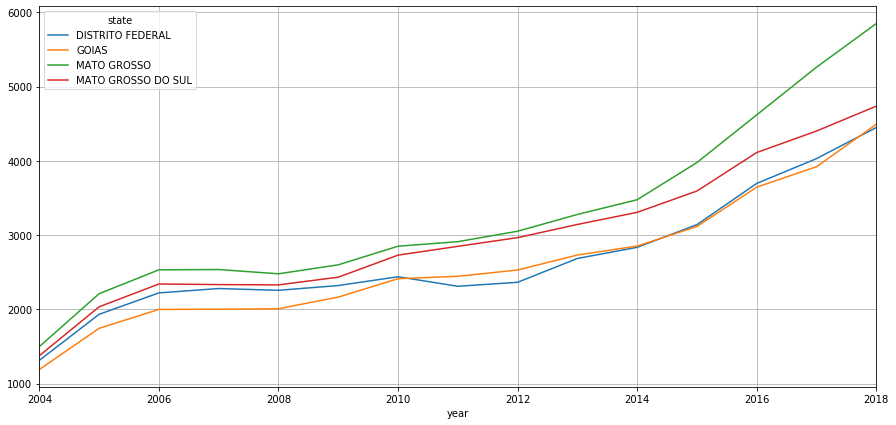

In [18]:
# plot Regionwise Yearwise Average Price data
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019 & region in ["CENTRO OESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

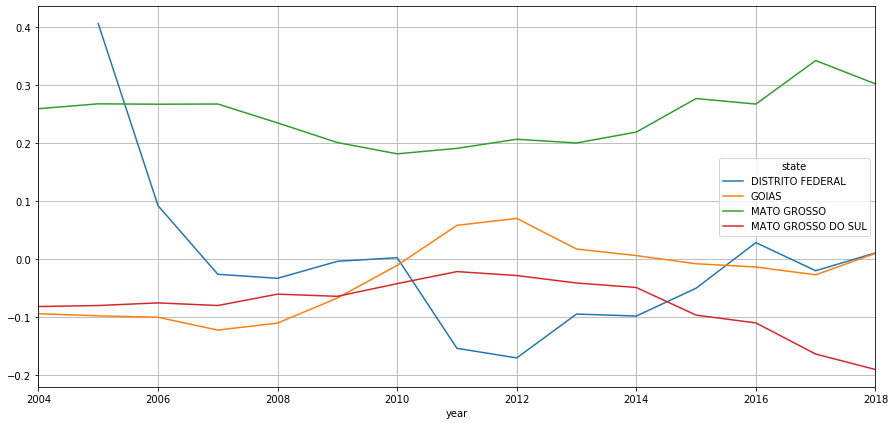

In [19]:
# plot Regionwise Yearwise Average Price Changes (% wise) data 
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019 & region in ["CENTRO OESTE"]').groupby(['year', 'state'])['avg_price'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

# Solution 02 (Part 02)
In **CENTRO OESTE** region **MATO GROSSO** state increased price mostly ~30% followed by **DISTRITO FEDERAL** with ~2%

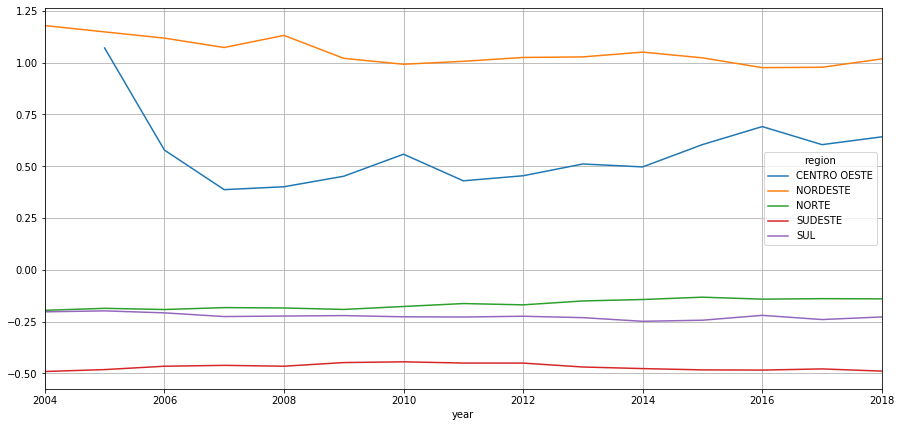

In [20]:
# plot Regionwise Yearwise Average Price Changes (% wise) data 
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019').groupby(['year','region']).sum()['avg_price'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

**As these two regions showed most of the price hike so we won't explore further to other regions. **

# Step 06: Data Mapping & Visualization (Problem 03)

Now let's solve the problem by running necessary queries and plot the columns to see the desired insights

In [21]:
df2.query('year!=2019').groupby(['year', 'state', 'product'])['avg_price'].agg('sum')

year  state             product         
2004  ACRE              ETANOL HIDRATADO      64.625
                        GASOLINA COMUM        86.083
                        GLP                 1298.038
                        ÓLEO DIESEL           62.617
      ALAGOAS           ETANOL HIDRATADO      48.333
                        GASOLINA COMUM        76.000
                        GLP                 1049.951
                        GNV                   37.092
                        ÓLEO DIESEL           50.165
      AMAPA             ETANOL HIDRATADO      64.358
                        GASOLINA COMUM        81.096
                        GLP                 1166.875
                        ÓLEO DIESEL           55.965
      AMAZONAS          ETANOL HIDRATADO      55.674
                        GASOLINA COMUM        76.557
                        GLP                 1047.163
                        ÓLEO DIESEL           55.458
      BAHIA             ETANOL HIDRATADO      53.546
     

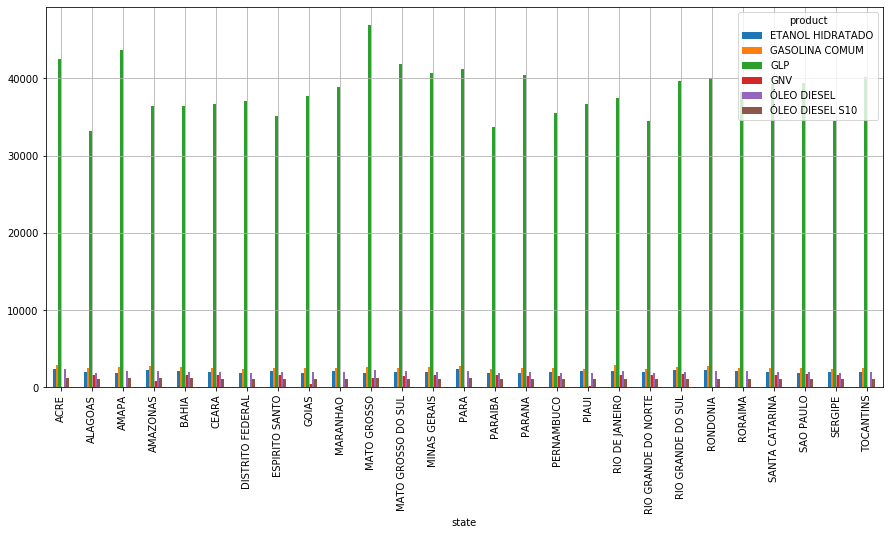

In [22]:
# plot Statewise Yearwise Most Expensive Product (GLP) Price data 
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019').groupby(['state','product'])['max_price'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

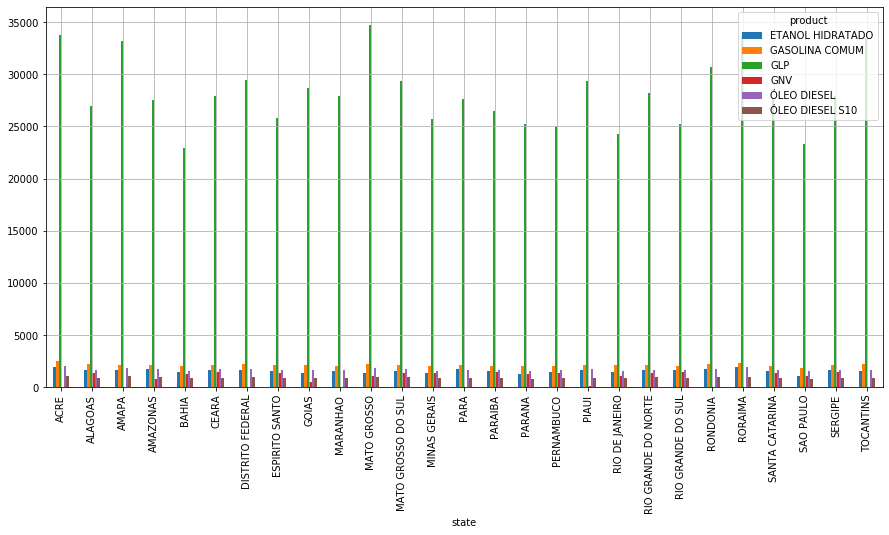

In [23]:
# plot Statewise Yearwise Most Expensive Product (GLP) Price data 
fig, ax = plt.subplots(figsize=(15,7))
df2.query('year!=2019').groupby(['state','product'])['min_price'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

# Solution 03
* For **GLP** state **MATO GROSSO** is most expensive and **BAHIA** is the cheapest. 
* For **GNV** state **RIO GRANDE DO SUL** is most expensive and **DISTRITO FEDERAL** is the cheapest.    
* For **GASOLINA COMUM** state **ACRE** is most expensive and **SAO PAULO** is the cheapest. 
* For **ETANOL HIDRATADO** state **PARA** is most expensive and **SAO PAULO** is the cheapest.   
* For **ÓLEO DIESEL** state **ACRE** is most expensive and **SAO PAULO** is the cheapest. 
* For **ÓLEO DIESEL S10** state **ACRE** is most expensive and **SAO PAULO** is the cheapest.    

# Happy Ending!